## The Exercise :- make a 2 conditional edges based from the exercise done from the 4th agent example 


In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph , START , END 


In [2]:
class CondiAgentState (TypedDict) : 
    num1 : int 
    op : str
    op2 : str
    num2 : int 
    num3 : int 
    num4 : int 
    fin1 : int 
    fin2 : int 




In [14]:
def adder(state : CondiAgentState) -> CondiAgentState : 
    """ This node creates adding possible between 2 numbers"""

    state["fin1"] = state["num1"] + state["num2"]

    print(state['fin1'])

    return state 

def subber(state : CondiAgentState) -> CondiAgentState : 
    """ This node creates subtracting possible between 2 numbers"""

    state["fin1"] = state["num1"] - state["num2"]

    print(state['fin1'])

    return state 

def adder1(state : CondiAgentState) -> CondiAgentState : 
    """ This node creates adding possible between 2 numbers"""

    state["fin2"] = state["num3"] + state["num4"]

    print(state['fin2'])

    return state 

def subber1(state : CondiAgentState) -> CondiAgentState : 
    """ This node creates subtracting possible between 2 numbers"""

    state["fin2"] = state["num3"] - state["num4"]
    print(state['fin2'])
    return state 

def agentcondition(state : CondiAgentState) -> CondiAgentState : 
    """ This node makes condition between num 1 and num 2 possible """

    if state['op'] == '+' :
        return "addop1"
    elif state['op'] == '-' : 
        return "subop1"


def agentcondition1(state : CondiAgentState) -> CondiAgentState : 
    """ This node makes condition between num 3 and num 4 possible """

    if state['op2'] == '+' :
        return "addop2"
    elif state['op2'] == '-' : 
        return "subop2"


In [19]:
graph = StateGraph(CondiAgentState)

graph.add_node("addnode", adder)
graph.add_node("subnode" , subber)
graph.add_node("router", lambda state:state)

graph.add_node("addnode1", adder1)
graph.add_node("subnode1" , subber1)
graph.add_node("router1", lambda state:state)


graph.add_edge(START,'router')
graph.add_conditional_edges(

    'router', # this is the start of the conditional logic 
    agentcondition, # this is the path in which the agent has to go 
    {
        "addop1" : "addnode",
        "subop1" : "subnode"
    }

)

graph.add_edge("addnode", 'router1')
graph.add_edge("subnode" , 'router1')

graph.add_conditional_edges(
    'router1',
    agentcondition1,
    {
        "addop2" : 'addnode1',
        "subop2" : 'subnode1'
    }
)

graph.add_edge("addnode1", END)
graph.add_edge("subnode1", END)


app = graph.compile()

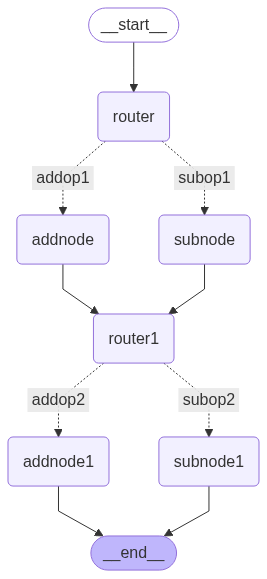

In [23]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
result = CondiAgentState(num1 = 23 , op = "+" , num2 = 223 , num3 = 4243 , op1 = "-" , num4 = 543 , fin1 = 0 , fin2 = 0)

print(app.invoke(result))

246


KeyError: 'op2'